In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KN

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = model.predict(X_test)

In [8]:
model.predict(sc.transform([[30, 87000]]))

array([0])

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.93
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [11]:
for metric in ["euclidean", "manhattan"]:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"Accuracy using {metric} distance:", accuracy_score(y_test, y_pred))


Accuracy using euclidean distance: 0.93
Accuracy using manhattan distance: 0.93


In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best K-value:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best K-value: {'n_neighbors': 5}
Best Accuracy: 0.9033333333333333


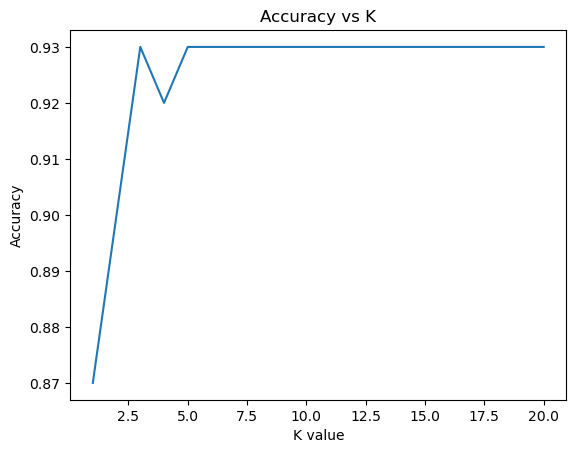

In [13]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

plt.plot(k_values, accuracies)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()


<Axes: >

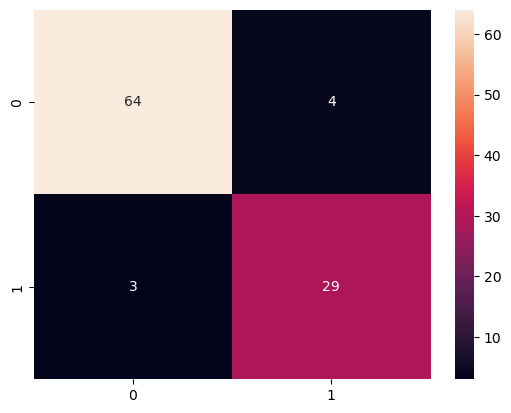

In [10]:
import seaborn as sns
sns.heatmap(cm, annot=True)